In [1]:
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
from tensorflow import keras


BASE_DIR = 'glove/'
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')

print('Indexing word vectors.')

embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.300d.txt'),encoding='utf-8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


/Users/arjunkhare/Documents/Programming/VirtualEnvs/tfenv/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print('Embedding vector size: ',len(embeddings_index['the']))

Embedding vector size:  300


In [3]:
#Note that each question is lowercase and has been stripped of punctuation
question_array = np.array([["what color is the carpet"],["what is dangerous above the boys head"],["what color is the dog"],["what color is the clock"],["what size is the cup"]]) 
solution_array = np.array(["red","knife","brown","white","blue"])
question_index = np.array([1,2,3,4,5])
print('Found %s questions.' % len(question_array))

def keep_question(question_array):
    """A function that takes in an array of different questions and returns an array of question embeddings. 
    If a word isn't found within Glove, that word is simply taken out of the question embedding. 
    """
    question_embeddings=[]
    for i in range(len(question_array)): #For each question
        question_embedding=np.zeros((300))
        question = question_array[i][0]
        for word in question.split(): #For each word in each question
            try: #If the word embedding is found
                word_embedding = embeddings_index[word]
                question_embedding = [a+b for a,b in zip(question_embedding, word_embedding)] #Sum the word embeddings
            except:
                continue
        question_embeddings.append(question_embedding)
    return question_embeddings

def discard_question(question_array):
    """A function that takes in an array of different questins and returns the embeddings of each question. 
    If a word isn't found within Glove, the entire question is discarded and an empty array is returned. 
    """
    question_embeddings=[]
    for i in range(len(question_array)): #For each question
        words_exist = True
        question_embedding=np.zeros((300))
        question = question_array[i][0]
        for word in question.split(): #For each word in each question
            try: #If the word embedding is found
                word_embedding = embeddings_index[word]
                question_embedding = [a+b for a,b in zip(question_embedding, word_embedding)] #Sum the word embeddings
            except:
                words_exist=False
                break
        if words_exist: 
            question_embeddings.append(question_embedding)
    return question_embeddings

Found 5 questions.


In [4]:
question_embeddings=np.array(keep_question(question_array))
question_embeddings.shape

(5, 300)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn_questions = KNeighborsClassifier(n_neighbors=3)
knn_questions.fit(question_embeddings,question_index)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
test_question = "what is dangerous above the cup"
test_embedding = np.array(keep_question([[test_question]]))
closest_questions = knn_questions.kneighbors(test_embedding)
closest_questions #Here the closest questions are questions with index 4, 1, 2

(array([[ 9.98910427, 10.99277865, 14.18404795]]), array([[4, 1, 2]]))

In [23]:
%run embed_images.ipynb

In [17]:
%run "Load_Create Data.ipynb"

loading VQA annotations and questions into memory...
0:00:00.991322
creating index...
index created!


In [9]:
data_vals = get_by_ques_type(["how many"])

In [10]:
import re
question_array = [re.sub(r'[^\w\s]','',val['question']).lower() for val in data_vals]

In [40]:
id_array = [val['question_id'] for val in data_vals]
question_id_to_question = dict(zip(id_array, question_array))

In [12]:
image_id_array = [val['image_id'] for val in data_vals]

In [38]:
question_id_to_image_id = {val['question_id']:val['image_id'] for val in data_vals}
image_id_to_question_id = {val['image_id']:val['question_id'] for val in data_vals}

In [14]:
question_embeddings=np.array(keep_question(question_array[:-1]))
knn_questions.fit(question_embeddings, id_array[:-1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
test_question = question_array[-1]
test_embedding = np.array(keep_question([[test_question]]))
closest_questions = knn_questions.kneighbors(test_embedding)

how many apples fell on the ground


In [44]:
print(closest_questions)
image_id_list = [question_id_to_image_id[id_array[q]] for q in closest_questions[1][0]]
print(image_id_list)
closest = get_closest_image(question_id_to_image_id[id_array[-1]], image_id_list)

(array([[26.61196231, 26.61196231, 26.61196231]]), array([[367,  86, 180]]))
[15533, 11069, 11921]
./data/abstract_images/abstract_v002_train2015_000000006396.png
./data/abstract_images/abstract_v002_train2015_000000006396.png


how many apples fell on the ground


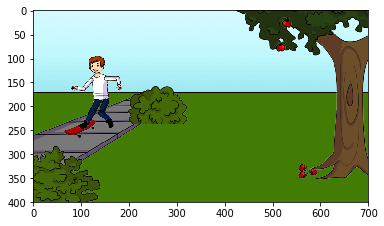

In [41]:
print(question_id_to_question[id_array[-1]])
impath = img_id_to_path(question_id_to_image_id[id_array[-1]])
I = io.imread(impath)
plt.imshow(I)
plt.show()

how many trees


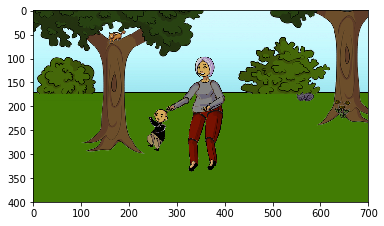

In [57]:
print(question_id_to_question[image_id_to_question_id[closest]])
closest_path = img_id_to_path(closest)
I = io.imread(closest_path)
plt.imshow(I)
plt.show()